# K-means clustering algorithm

In [11]:
#  importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [12]:
# generate our own data using the make_blobs function from the sklearn.datasets 
X, y = make_blobs(n_samples=300, centers=None, cluster_std=0.60, random_state=0)

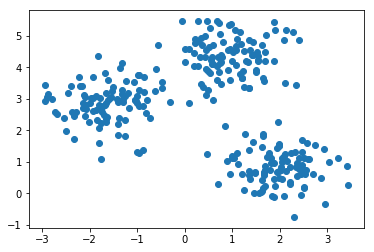

In [13]:
plt.scatter(X[:,0], X[:,1])

In [14]:
def plot_KMeans(num_cluster,  num_iteration):          # num_cluster  should not be over 10 
    # Set initial value of center of  each cluster at my will
    model = KMeans(n_clusters=num_cluster, init='random', max_iter=num_iteration, random_state=0)
    model.fit(X)
    markers = ['v', '^', '<', '>', 'D', 'o', 'x', 's', 'P', '*']
    colors = ['red', 'orange',  'yellow', 'green', 'blue', 'brown', 'cyan', 'mint', 'wine', 'gray']
    for i in range(num_cluster):
        plt.scatter(X[model.labels_ == i, 0], X[model.labels_ == i, 1], marker=markers[i], facecolor=colors[i], edgecolors='k')
        plt.scatter(model.cluster_centers_[i][0], model.cluster_centers_[i][1], marker=markers[i], c=colors[i], s=200)
    plt.grid(False)
    plt.title("cluster={}, iteration={}, score={:5.2f}".format(num_cluster,  num_iteration, model.score(X)))
    return model.inertia_

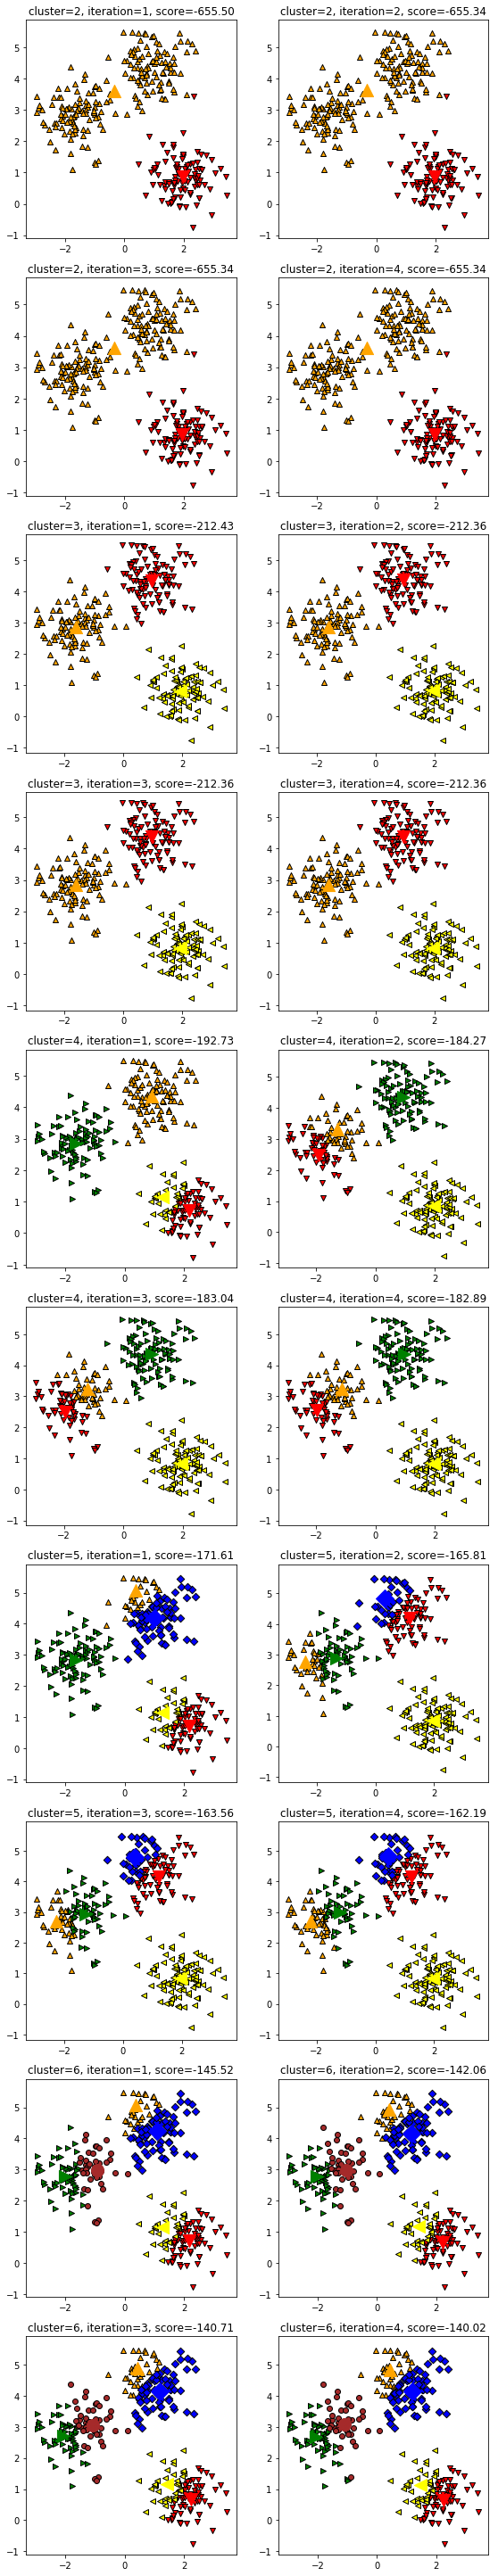

In [15]:
clusters = 6         # 클러스터 개수
iterations = 4     # 학습 반복 수
if clusters > 10:
    print('the number of clusters should be less than 10 because of the number of markers')

total_column_of_figure = 2       # subplot을 그릴 때 한 행에 그릴 plot의 개수
total_row_of_figure = clusters * iterations /  total_column_of_figure
plt.figure(figsize=(total_column_of_figure*4, total_row_of_figure*4))

inertias = [[0.0 for x in range(iterations)] for y in range(clusters)] 
number = 1
for c in range(1, clusters):
    for i in range(1, iterations+1):
        plt.subplot(total_row_of_figure, total_column_of_figure, number)
        number += 1        
        inertia = plot_KMeans(c+1, i)
        inertias[c-1][i-1] = inertia

plt.tight_layout()
plt.show()

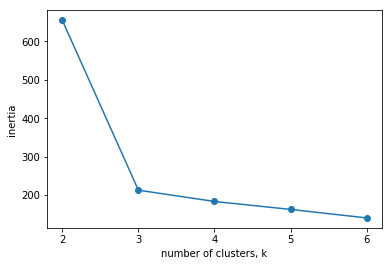

In [16]:
# plot inertias according to k under max iterations
range_of_cluster = range(2, clusters+1)
plt.plot(range_of_cluster, np.array(inertias)[:clusters-1, iterations-1],  '-o')  # inertias under max iteration 
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range_of_cluster)
plt.show()

=> 클러스터 개수가 3개일 때가 적당함을 알 수 있다.